# LDEO Python class
## Elizabeth Ferriss, Sept. 30 2015
## Requested topics for plotting
* Adding text to figures
* [Saving figures](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) with different formats, sizes, and resolutions
* Subplotting 
* Shading in areas
* pcolor maps
* Subplots with different color schemes
* Custom colorbars
* Streamlines and quiver
* Irregular contour intervals and scaling
* Data masking

## Python 2.7 code for a figure with most of these elements
The right subplot data are from the [streamplot demo from the matplotlib gallery](http://matplotlib.org/examples/images_contours_and_fields/streamplot_demo_features.html)

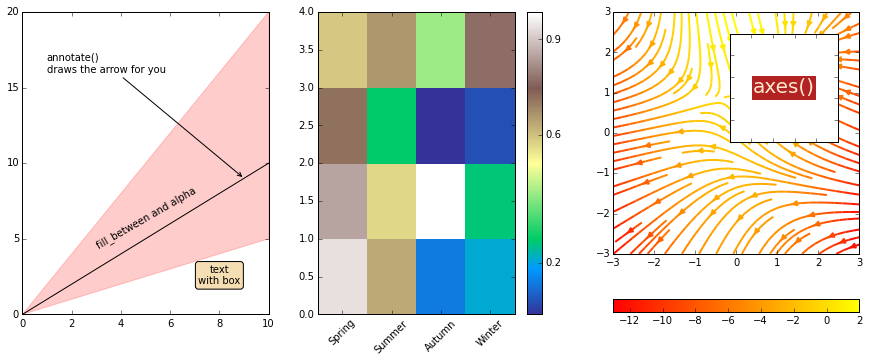

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(15, 6))

# Left subplot
ax1 = fig.add_subplot(131)
ax1.plot(x, x, color='black')
ax1.fill_between(x, 2.*x, 0.5*x, color='red', alpha=0.2)
ax1.text(5, 8, 'fill_between and alpha', rotation=30, ha='center')
ax1.text(8, 2, 'text\nwith box', ha='center',
         bbox=dict(boxstyle='round', facecolor='wheat'))
ax1.annotate('annotate()\ndraws the arrow for you', xy=(9, 9), xytext=(1, 16),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.set_ylim(0, 20)

# Middle subplot
ax2 = fig.add_subplot(132)
pcolor_data = np.random.rand(4, 4)
pcolor_map = ax2.pcolor(pcolor_data, cmap='terrain')
labels = ['Spring', 'Summer', 'Autumn', 'Winter']
xlabels = [0.5, 1.5, 2.5, 3.5]
plt.xticks(xlabels, labels, rotation=45)
fig.colorbar(pcolor_map, ax=ax2, fraction=0.15, ticks=[0.2, 0.6, 0.9])

# Right subplot from gallery example
ax3 = fig.add_subplot(133)
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)
plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
plt.colorbar(orientation='horizontal', fraction=0.05)

# Inset on right subplot
ax4 = plt.axes([0.78, 0.6, 0.1, 0.25])
ax4.text(0.5, 0.5, 'axes()', backgroundcolor='firebrick', color='blanchedalmond',
         ha='center', va='center', fontsize=20)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

# Move subplots up from bottom and save
plt.subplots_adjust(bottom=0.2)
plt.savefig('ExampleFigure1.png', dpi=200)
plt.savefig('ExampleFigure1.tiff', dpi=50)
plt.savefig('ExampleFigure1.svg') 

## On subplotting
There are a few different options for making subplots with matplotlib. Once you are comfortable with add_subplot, you might want to try using a more complicated grid setup.

### Recommendation: Make the figure first, then add subplots either individually or all at once in a grid
You want the figure to have its own handle, e.g., the 'fig' in fig=plt.figure(), so that you can play with the size and save the figure without having to muck with anything else. You also want a handle for each subplot, e.g., ax1 = plt.add_subplot(211), so that you can do stuff to each of them, group and loop through them, and easily switch around between different axes (subplots).

### Options for adding subplots
* [subplot()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot) and add_subplot()  
Probably most like what you might be used to from Matlab, but also doesn't give you as much control as some other options. You specify the grid you want by putting [numbers in parentheses](http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111). The default plotting command is equivalent to subplot(111), making a 1x1 grid of subplots and plotting in axis 1. 
* subplot2grid  
like subplot but uses 0-based indexing, a slightly more complicated input system (example below), and lets the subplot occupy multiple cells.
* [axes](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axes)  
Adds an axis at a specific location. This is probably what you want for making a small subplot within the contour of a map or other figure, although it can get [tricky](http://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib) if that larger figure is already a subplot.
* [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) (_plural_)  
Quickly creates a grid of subplots with axis handles and gives you a little bit more control than in singular subplot. 
* Additional control over spacing and layout are available with [gridspec](http://matplotlib.org/users/gridspec.html) and subplots_adjust

### An illustration of subplot2grid
Try playing with the number of columns (ncol) and rows (nrow)

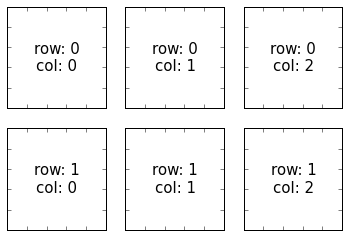

In [9]:
fig2 = plt.figure()
ncol = 3
nrow = 2
for col in range(ncol):
    for row in range(nrow):
        # Each pass through this loop adds a new subplot
        ax = plt.subplot2grid((nrow,ncol),(row, col)) 
        string = ' '.join(('row:', '{:.0f}'.format(row),
                           '\ncol:', '{:.0f}'.format(col)))
        ax.text(0.5, 0.5, string, ha='center', va='center', fontsize=15)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
